# Assignment II

Atahan Özer - 6317973\
Karahan Sarıtaş - 6661689

## Problem 3
**(a)** Implement the weighted degree kernel as a function in python that takes two sequences as well as the
parameter $d$, and the $β$ parameters.

\begin{align*}
k(s_i, s_j) = \sum_{k=0}^{(d-1)} \beta_k \sum_{l=0}^{(L-k)} I(u_{k,l}(s_i) = u_{k,l}(s_j))
\end{align*}

$u_{k,l}$ is the $k$-mer of length $k$ starting at position $l$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# O(n^2) wdk
def naive_wdk(s1, s2, d, weights):
  assert len(weights) == d, "Number of weighting coefficients must be equal to the order of the kernel"
  L = min(len(s1), len(s2))
  sum = 0

  for k in range(d):
    beta = weights[k]
    m = 0
    for l in range(L - k):
      m += (s1[l:l+k+1] == s2[l:l+k+1])
    sum += beta * m
  return sum

# O(n) wdk - single pass through the sequence (requires slightly more memory due to extra variables)
def wdk(s1, s2, d, weights):
  assert len(weights) == d, "Number of weighting coefficients must be equal to the order of the kernel"
  L = min(len(s1), len(s2))
  result, kmer, rem, inc = 0, 0, 0, 0
  for i in range(L):
    if s1[i] == s2[i]:
      rem = rem + weights[inc] if inc < d else rem
      kmer += rem
      inc += 1
    else:
      result += kmer
      rem, kmer, inc = 0, 0, 0
  result += kmer
  return result

In [4]:
"""
1: 15
2: 10
3: 6
4: 4
5: 3
6: 2
7: 1
Expected output: 41
"""
wdk("AGTCAGATAGAGGACATCAGTAGACAGATTAAA", "TTATAGATAGACAAAGACATCAGTAGACTTATT", 7, [1,1,1,1,1,1,1])

41

**(b)** Visualize the kernel matrix for $d = 4$ and $β_k = \frac{2(d − k + 1)}{d(d + 1)}$ for the 8 sequences from ```sequencesMSAfasta.sec```. The visualization should show an 8 x 8 matrix representing the kernel values in a heat
map. (Here, we assume we're starting with $k$ equal to 1.)


In [16]:
f = open("sequencesMSAfasta.sec", "r")
lines = f.readlines()
# .fasta format: A sequence begins with a greater-than character (">") followed by a description of the sequence (all in a single line)
keys = []
seqs = []
for i in range(len(lines) // 2):
  keys.append(lines[i * 2].strip()[1:])
  seqs.append(lines[i * 2 + 1].strip().replace("-",""))

keys, seqs

(['AF153142',
  'AF153143',
  'AF153144',
  'AF153145',
  'HQ906866',
  'HQ906868',
  'HM246199',
  'HQ678267'],
 ['TGTACAAGACCCAACAATAATACAAGAAAAAGTATAAGGATAGGACCAGGACAAACATTCTATGCAACAGGAGTCATAATAGGAGACATAAGACAAGCACATTGT',
  'TGTACAAGGCCCGGCAATAATACAAGGAAAAGTATGAGGATAGGACCAGGACAAACATTCTATGCAACAGGAGACATAATAGGAGATATAAGACAAGCACATTGT',
  'TGTACAAGACCCAATAATAATACAAGAAAAAGCATAAGGATAGGACCAGGACAAACATTCTATGCAAATAATGCCATAATAGGAAACATAAGACAAGCACATTGT',
  'TGTACAAGACCCAACAATAATACAAGAAAAAGTATAAGGATAGGACCAGGACAAACATTCTTTGCAACAAATGCCATAATAGGAGACATAAGACAAGCACATTGT',
  'TGCACAAGGCCCTACGATAAGGTAAGCTACAGGACACCTATAGGARTAGGGCGAGCATCCTATACAACAAGAATAAAAGGAGATATAAGACAAGCACATTGT',
  'TGCACAAGGCCCTACAACAATATAAGACAAAGGACCCCCATAGGACTAGGGCAAGCACTCTATACAACAAGAAGAATAGAAGATATAAGAAGAGCACATTGT',
  'TGTACCAGACCCTTCAAAAAGATAAGAACAAGTCTAAGGATAGGACCAGGACAAGTATTCTATAGGACAGGAGGCATAAACGGAGATATAAGGAGAGCACATTGC',
  'TGTACAAGACCCAACACCAAGACAAGAAAAAGGATACATATAGGACCAGGCAGAGCATTTTATACAACAAAAACAGTAAGAGATATAAGACAAGCACACTGT'])

In [17]:
def get_weight(k, d):
  return 2 * (d - k + 1) / (d * (d+1))

In [18]:
d = 4
weights = []
for k in range(1, d + 1):
  weights.append(get_weight(k, d))
weights

[0.4, 0.3, 0.2, 0.1]

In [19]:
matrix = []
for s1 in seqs:
  row = []
  for s2 in seqs:
    row.append(wdk(s1, s2, d, weights))
  matrix.append(row)

matrix = np.array(matrix)

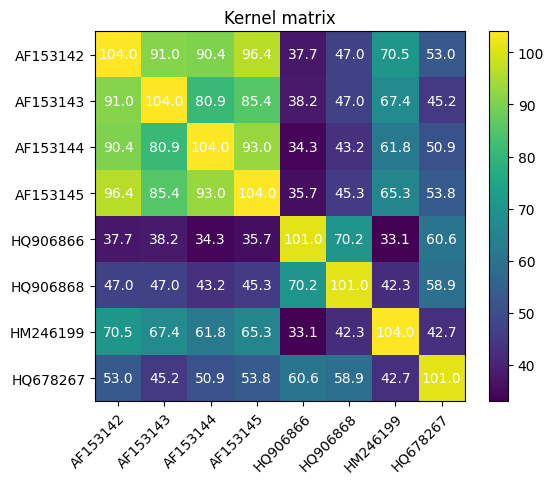

In [20]:
fig, ax = plt.subplots()
plt.imshow(matrix, cmap="viridis")
plt.colorbar()

ax.set_xticks(np.arange(len(keys)), labels=keys)
ax.set_yticks(np.arange(len(keys)), labels=keys)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(keys)):
    for j in range(len(keys)):
        text = ax.text(j, i, "{:.1f}".format(matrix[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("Kernel matrix")
plt.show()